In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import normalize

In [3]:
def get(filename):
    return pd.read_excel(filename, index_col='Runner_ID')

In [6]:
def sort_trim_data(filename, mf_cutoff=60):
    df = pd.read_excel(filename, index_col='Runner_ID')
    return df.loc[df['Misfit'] < mf_cutoff]

In [7]:
df = sort_trim_data('https://www.dropbox.com/s/y8kkexkwv59ix1w/Porosity_1_RunData.xlsx?raw=1',mf_cutoff=500)
df

,$a1,$a10,$a11,$a12,$a13,$a14,$a15,$a16,$a17,$a18,...,$por4,$por5,$por6,$por7,$por8,$por9,$sor,$swc,$trans,Misfit
Runner_ID,,,,,,,,,,,,,,,,,,,,,
Local-runner0-1,3.573892,3.294591,3.671421,3.517670,3.716327,3.641475,3.928904,3.298447,3.258850,3.530102,...,0.975339,1.076017,1.152993,1.069733,0.670276,1.005566,0.268866,0.385513,0.049073,227.999180
Local-runner0-10,3.468248,3.511685,3.263216,3.658032,3.936999,3.852553,3.662110,3.928918,3.610847,3.532679,...,1.193717,0.661964,1.025090,0.807932,0.845921,0.919901,0.246360,0.324249,0.164279,195.524054
Local-runner0-100,3.247984,3.221589,3.706017,3.559843,3.512424,3.814849,3.531473,3.449830,3.976198,3.984320,...,0.978427,0.826068,1.120427,0.981177,0.954404,1.131530,0.278130,0.287291,0.129042,60.756806
Local-runner0-101,3.311945,3.297327,3.875670,3.525178,3.634479,3.972066,3.524311,3.399775,3.975902,3.910534,...,1.016750,0.831656,0.893355,1.044626,0.979616,1.010588,0.298991,0.279173,0.100643,66.739312
Local-runner0-102,3.283288,3.218762,3.808841,3.567434,3.251506,3.831298,3.503412,3.440426,3.994554,3.872313,...,1.037689,0.853488,1.093330,1.010238,1.016313,1.053674,0.286071,0.280765,0.114476,67.632668
Local-runner0-103,3.288557,3.262831,3.952183,3.451320,3.278155,3.975141,3.636163,3.387774,3.891187,3.755109,...,0.906676,0.864078,1.176534,1.013905,0.984993,1.062530,0.281033,0.209849,0.122019,184.172016
Local-runner0-104,3.310157,3.224579,3.786014,3.545523,3.414519,3.815156,3.494426,3.518310,3.963602,3.881306,...,1.024835,0.852684,1.172940,1.016842,0.959483,1.146374,0.279467,0.254162,0.109264,67.489575
Local-runner0-105,3.293472,3.225310,3.804744,3.560803,3.258714,3.863958,3.302487,3.395573,3.991341,3.998836,...,0.977718,0.881509,1.170829,1.001577,0.961045,0.977012,0.299082,0.277012,0.108497,101.150459
Local-runner0-106,3.314593,3.218638,3.785653,3.468381,3.262652,3.815837,3.487990,3.480015,3.959078,3.865243,...,1.033917,0.842886,1.141813,1.050987,0.865935,1.147001,0.278561,0.248972,0.106950,57.781882


In [8]:
reducer = umap.UMAP()

In [11]:
embedding = reducer.fit_transform(normalize(df.drop('Misfit', axis=1)))
embedding.shape

(1980, 2)

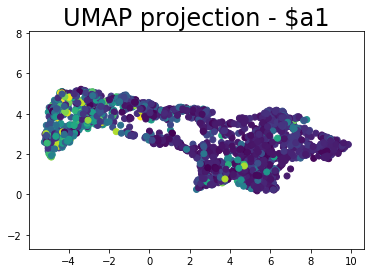

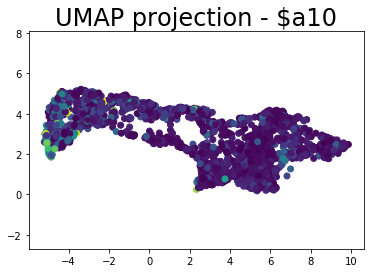

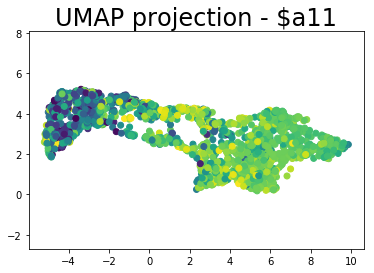

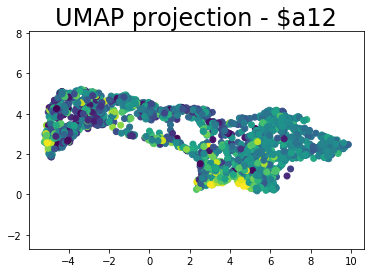

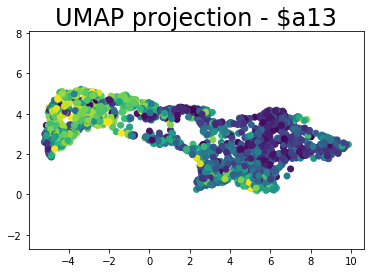

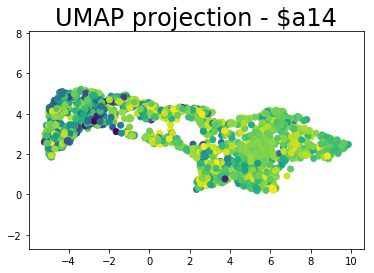

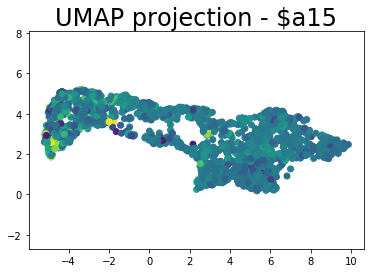

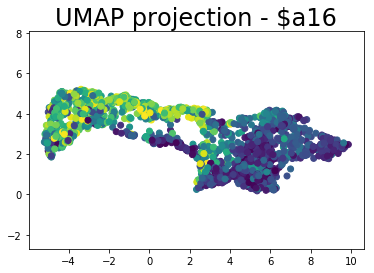

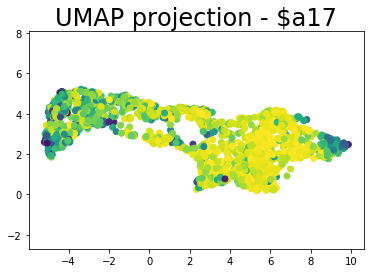

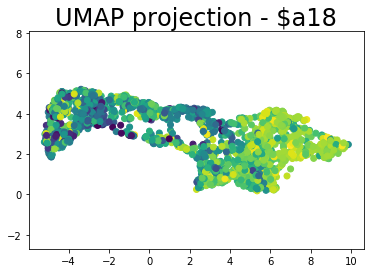

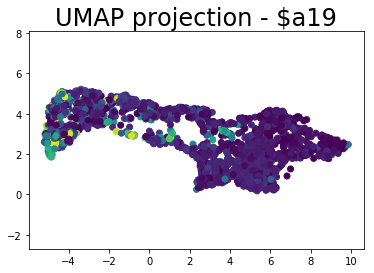

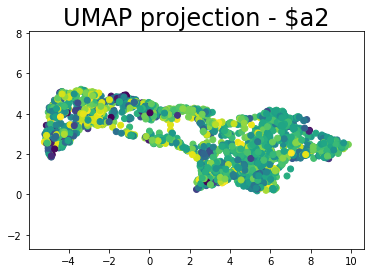

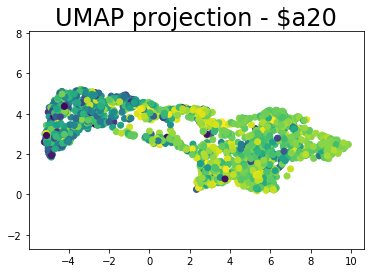

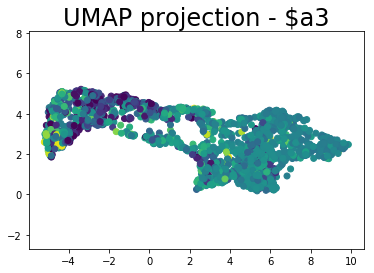

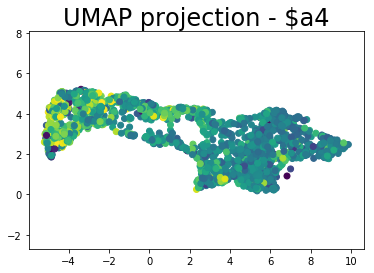

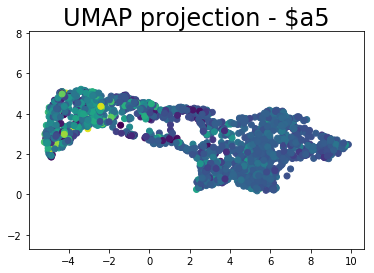

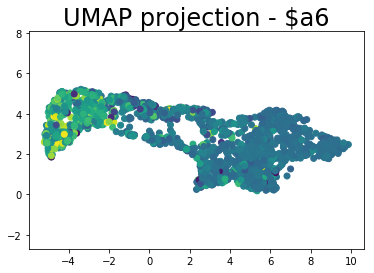

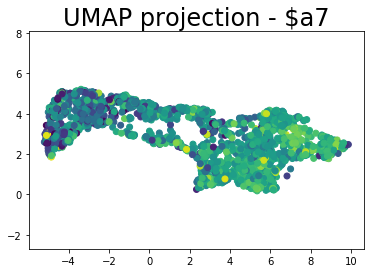

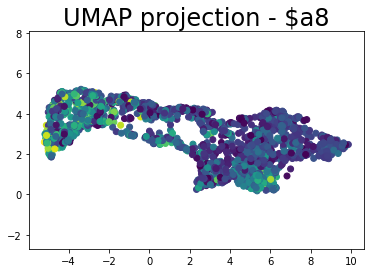

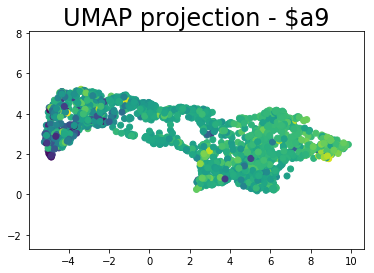

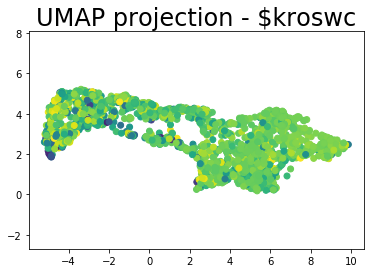

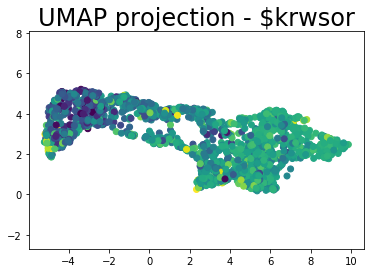

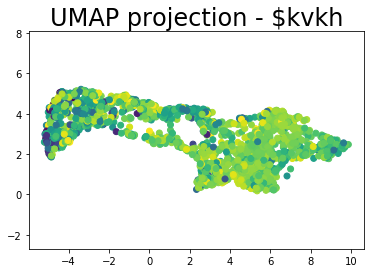

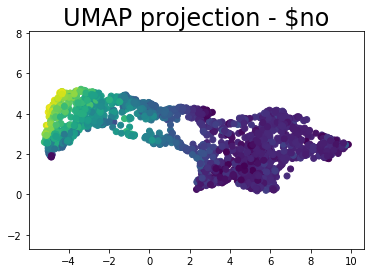

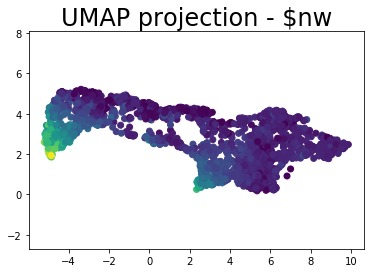

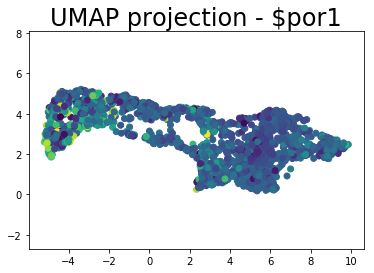

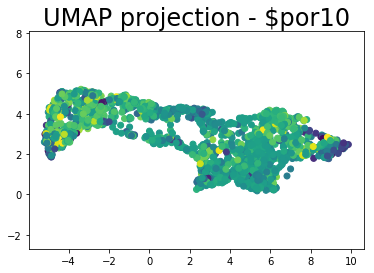

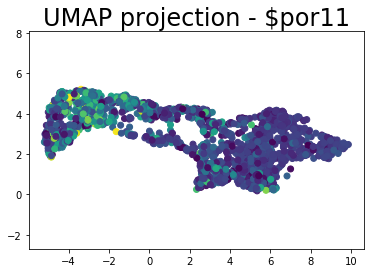

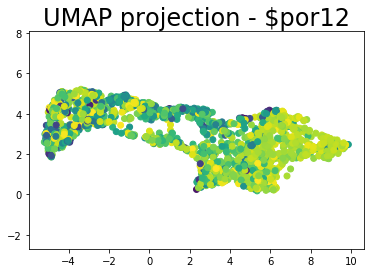

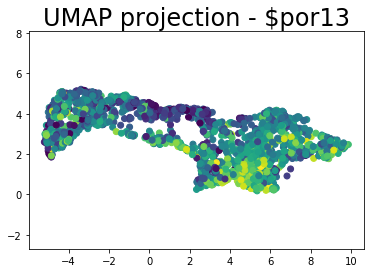

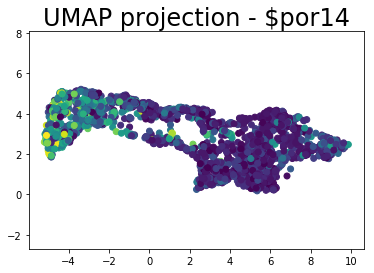

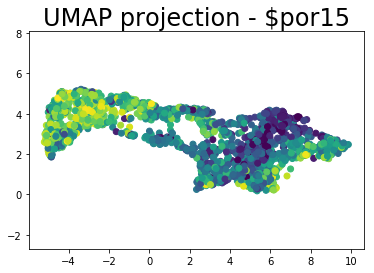

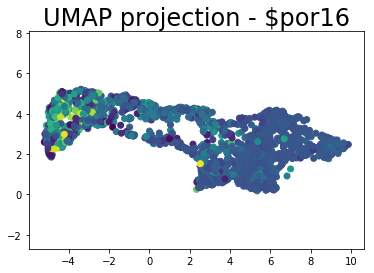

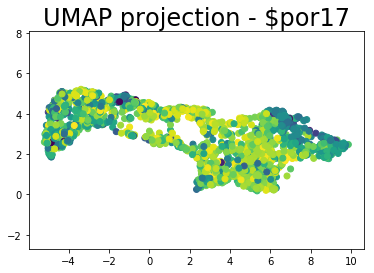

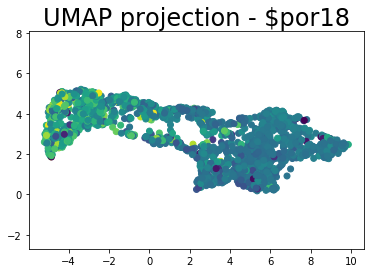

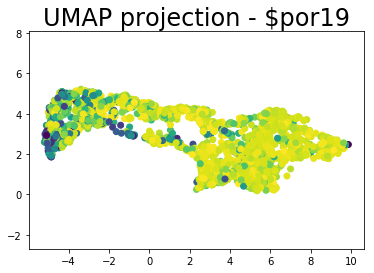

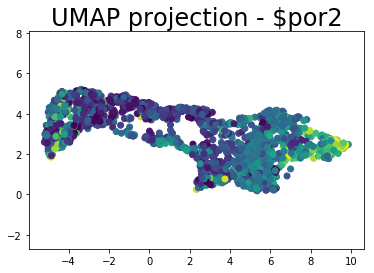

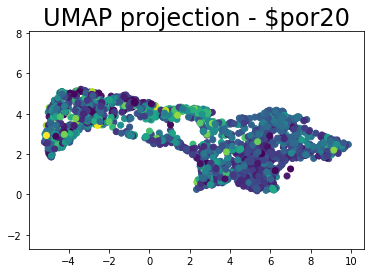

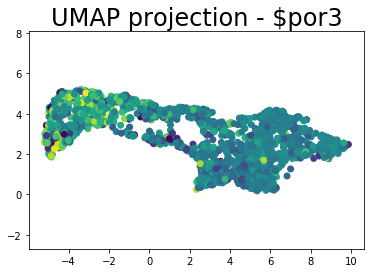

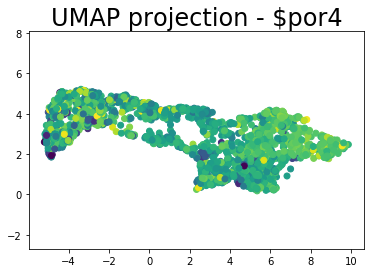

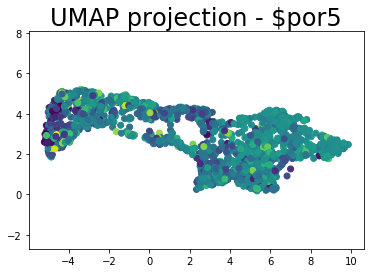

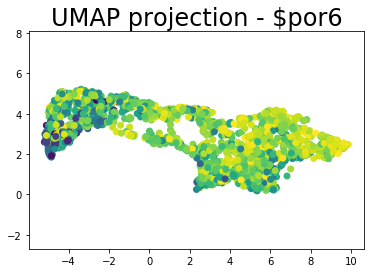

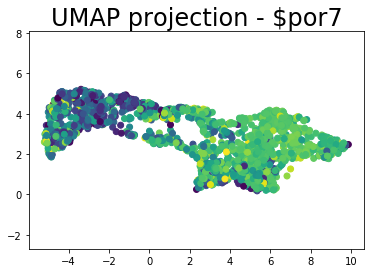

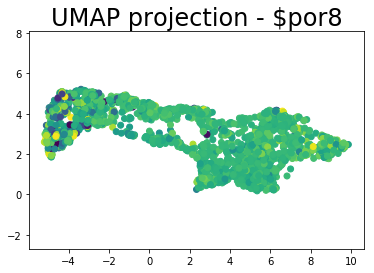

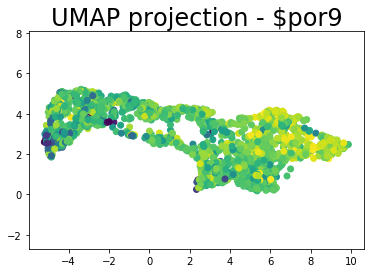

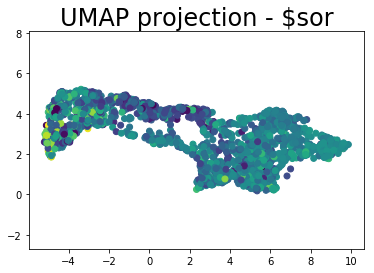

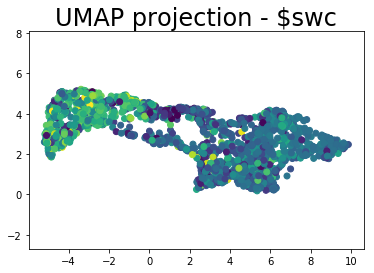

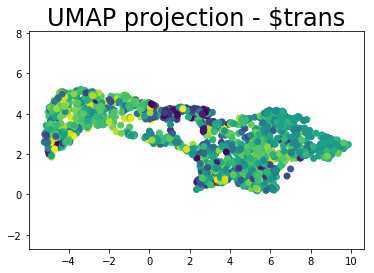

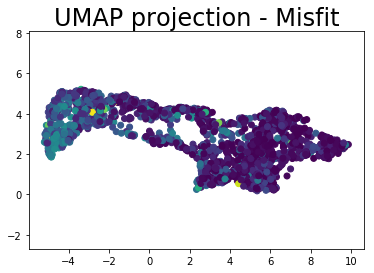

In [12]:
for i in df.columns:
    plt.scatter(embedding[:, 0], embedding[:, 1], c=df[i])
    plt.gca().set_aspect('equal', 'datalim')
    plt.title('UMAP projection - '+i, fontsize=24);
    plt.show()